# <center> Проект</center>
Перед началом выполнения проекта, необходимо изменить имя вашего ноутбука/ПК на вашу фамилию на английском языке (например: **Ivanov**). Затем <font color='red'> **обязательно выполнить код в ячейках ниже (их 4)**</font> (*в случае не выполнения, будут вычиляться 5 баллов из проекта*). В случае если модуль `datetime` не установлен нужно установить.

In [177]:
import os
os.getlogin()

'Home'

In [178]:
import socket
socket.gethostbyname(socket.gethostname())

'192.168.1.68'

In [179]:
!whoami

rogozhina\home


In [180]:
from datetime import datetime

current_time = datetime.now()
print(current_time)
print("Rogozhina N.A.") # написать здесь свою фамилию и инициалы

2023-01-05 23:54:46.160507
Rogozhina N.A.


Скачайте таблицы в формате .csv из pgadmin и далее считайте данные таблицы.

**Предобработка данных и их изучения.**

1.	Выведите по 5 строк с каждой таблицы.
2.	Введите информацию о каждой таблицы и изучите их (возможно есть какие-то странности. *Опишите полученные данные.*
3.	Проверьте данные на пропуски и дубликаты.
4.	Вычислите сводную (описательную) статистику о данных датафреймов (таблиц) и выведите ее. *Опишите полученный результат.*
5.	Если в некоторых столбцах нужно изменить данные, измените их и аргументируйте зачем их стоит изменить (например, дата должна иметь тип данных datetime64, а не object).

**Задания:**

1.	Найдите все параметры ПК, имеющие 8x или 40x CD и цену более 600. Отсортируйте по скорости и цене. 
2.	Для каждого производителя, выпускающего лаптоты c объёмом жесткого диска не менее 10 Гбайт и ОЗУ не менее 64 мб, найти скорости таких лаптопов. Выведите производителей и скорость. Нарисуйте график зависимости скоростей от полученных моделей ноутбуков. *Опишите полученный график.*
3.	Найдите номера моделей, тип и цены всех ноутбуков производителя А. Отсортируйте по убыванию цены. Постройте гистограмму изменения цены. *Опишите полученный результат и гистограмму.*
4.	Найдите производителя, номер модели и цену среди ноутбуков с наибольшей стоимостью до 1000; Нарисуйте график зависимости цен от всех производителей ноутбуков. *Опишите полученный график.*
5.	Найдите для каждой модели ПК их количество и максимальное и минимальное ram, сгруппируйте по моделям; переименуйте колонки макс. и мин. в “max/min_ram”;
6.	Проверти гипотезу: «Самые дорогие ноутбуки у производителя А». *Опишите полученный результат.*
7.	Постройте матрицы корреляции для всех таблиц. *Опишите полученный результат.* Необязательно, но, если будет желание, нарисовать график тепловой карты матриц корреляции используя функцию heatmap из библиотеки seaborn.  *Опишите полученный графики.*
8.	Нарисуйте график (не графики, на одном графики должно отображаться всё) зависимости цены ноутбук/ПК от объёма жесткого диска. *Опишите ваши наблюдения, существует ли какая-то зависимость и т.п.*
9.	Найдите: 

    a.	количество товаров каждого типа у каждого производителя; постройте график pie, на должно отображаться доля каждого производителя. *Опишите полученные графики.*
    
    b.	самый дорогой товар каждого типа, вывести тип и цену;

    c.	производителей, делающих ноутбуки и пк ценой более 600$, но которые не производят принтеры, вывести производителя.
10.	Выведите новую цену каждого ноутбука и ПК получив её как модель+цена+ram. Дайте колонке название ‘strange_sum’;
11.	Найти производителей, делающих ноутбуки и ПК, но не принтеры;
12.	Найдите производителя ПК и модель, чья цена ниже средней цены ноутбука, а ram и скорость больше в 1.5 и 1.2 раза соответственно;
13.	Написать общий вывод о полученных результатах (какие важные закономерности были вами обнаружены или получены и т.п.).

In [1]:
import pandas
import seaborn

1. Прочитаем данные из скачанных нами таблиц - для этого используем **pandas.read_csv('*путь к файлу*')**

In [2]:

pc = pandas.read_csv('C:/Users/Home/Documents/pc.csv')
printer = pandas.read_csv('C:/Users/Home/Documents/printer.csv')
laptop = pandas.read_csv('C:/Users/Home/Documents/laptop.csv')
product = pandas.read_csv('C:/Users/Home/Documents/product.csv')


# Предобработка данных и их изучение

Первым шагом выведем по 5 строк с каждой таблицы:

In [105]:
pc.head(5)

,code,model,speed,ram,hd,cd,price
0,1,1232,500,64,5,12x,600.0
1,10,1260,500,32,10,12x,350.0
2,11,1233,900,128,40,40x,980.0
3,12,1233,800,128,20,50x,970.0
4,2,1121,750,128,14,40x,850.0


In [39]:
printer.head(5)

,code,model,color,type,price
0,1,1276,n,Laser,400.0
1,2,1433,y,Jet,270.0
2,3,1434,y,Jet,290.0
3,4,1401,n,Matrix,150.0
4,5,1408,n,Matrix,270.0


In [40]:
laptop.head(5)

,code,model,speed,ram,hd,price,screen
0,1,1298,350,32,4,700.0,11
1,2,1321,500,64,8,970.0,12
2,3,1750,750,128,12,1200.0,14
3,4,1298,600,64,10,1050.0,15
4,5,1752,750,128,10,1150.0,14


In [41]:
product.head(5)

,maker,model,type
0,A,1232,PC
1,A,1233,PC
2,A,1276,Printer
3,A,1298,Laptop
4,A,1401,Printer


Выведем информацию о каждой таблице:

In [42]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    12 non-null     int64  
 1   model   12 non-null     int64  
 2   speed   12 non-null     int64  
 3   ram     12 non-null     int64  
 4   hd      12 non-null     int64  
 5   cd      12 non-null     object 
 6   price   12 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 800.0+ bytes


In [43]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    6 non-null      int64  
 1   model   6 non-null      int64  
 2   speed   6 non-null      int64  
 3   ram     6 non-null      int64  
 4   hd      6 non-null      int64  
 5   price   6 non-null      float64
 6   screen  6 non-null      int64  
dtypes: float64(1), int64(6)
memory usage: 464.0 bytes


In [44]:
printer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    6 non-null      int64  
 1   model   6 non-null      int64  
 2   color   6 non-null      object 
 3   type    6 non-null      object 
 4   price   6 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 368.0+ bytes


In [45]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   maker   16 non-null     object
 1   model   16 non-null     int64 
 2   type    16 non-null     object
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


В таблице **pc** колонка *cd* имеет тип ***object***.

Проверим данные на пропуски с помощью метод [`isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)

In [7]:
pc_none = pc[pc.isna().any(axis=1)]
if len(pc_none) == 0:
    print('Пропусков нет')
else:
    print(pc_none)

Пропусков нет


In [8]:
laptop_none = laptop[laptop.isna().any(axis=1)]
if len(laptop_none) == 0:
    print('Пропусков нет')
else:
    print(laptop_none)

Пропусков нет


In [9]:
printer_none = printer[printer.isna().any(axis=1)]
if len(printer_none) == 0:
    print('Пропусков нет')
else:
    print(printer_none)

Пропусков нет


In [10]:
product_none = product[product.isna().any(axis=1)]
if len(product_none) == 0:
    print('Пропусков нет')
else:
    print(product_none)

Пропусков нет


Проверим дубликаты с помощью [`duplicated()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html):

In [11]:
pc_duplicated = pc[pc.duplicated()]
if len(pc_duplicated) == 0:
    print('Дубликатов нет')
else:
    print(pc_duplicated)

Дубликатов нет


In [12]:
laptop_duplicated = laptop[laptop.duplicated()]
if len(laptop_duplicated) == 0:
    print('Дубликатов нет')
else:
    print(laptop_duplicated)

Дубликатов нет


In [13]:
printer_duplicated = printer[printer.duplicated()]
if len(printer_duplicated) == 0:
    print('Дубликатов нет')
else:
    print(printer_duplicated)

Дубликатов нет


In [14]:
product_duplicated = product[product.duplicated()]
if len(product_duplicated) == 0:
    print('Дубликатов нет')
else:
    print(product_duplicated)

Дубликатов нет


Опишите сводный полученный результат:

In [125]:
pc.describe()

,code,model,speed,ram,hd,price
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,1206.916667,608.333333,88.000000,13.666667,675.000000
std,3.605551,52.397880,153.494645,43.417634,9.670323,261.342687
min,1.000000,1121.000000,450.000000,32.000000,5.000000,350.000000
25%,3.750000,1204.250000,500.000000,56.000000,8.000000,387.500000
50%,6.500000,1232.000000,550.000000,96.000000,10.000000,725.000000
75%,9.250000,1233.000000,750.000000,128.000000,15.500000,875.000000
max,12.000000,1260.000000,900.000000,128.000000,40.000000,980.000000


В данной таблице колонка *cd* имеет тип object, а метод [`describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) выводит статистику только на целочисленные показатели и показатели с плавающей точкой. Следовательно, статистики по полю *cd* не будет.

- count: количество объектов
- mean: среднее значение
- std: стандартное отклонение
- min: миниммальное значение
- N%: значение, за которым "лежит" N% меньших значений выборки
- max: максимальное значение

In [128]:
laptop.describe()

,code,model,speed,ram,hd,price,screen
count,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000
mean,3.500000,1452.833333,566.666667,80.000000,9.00000,1003.333333,13.000000
std,1.870829,231.131492,163.299316,39.191836,2.75681,177.951304,1.549193
min,1.000000,1298.000000,350.000000,32.000000,4.00000,700.000000,11.000000
25%,2.250000,1298.000000,462.500000,64.000000,8.50000,955.000000,12.000000
50%,3.500000,1309.500000,550.000000,64.000000,10.00000,1010.000000,13.000000
75%,4.750000,1642.750000,712.500000,112.000000,10.00000,1125.000000,14.000000
max,6.000000,1752.000000,750.000000,128.000000,12.00000,1200.000000,15.000000


В таблице **laptop** все значения имеют типы *int* либо *float*, поэтому все значения просчитаны.

In [129]:
printer.describe()

,code,model,price
count,6.000000,6.000000,6.000000
mean,3.500000,1373.333333,296.666667
std,1.870829,72.060160,94.162979
min,1.000000,1276.000000,150.000000
25%,2.250000,1316.250000,270.000000
50%,3.500000,1404.500000,280.000000
75%,4.750000,1426.750000,372.500000
max,6.000000,1434.000000,400.000000


В таблице **printer** колонки *color* и *type* имеют тип **object**, следовательно описания по этим колонкам не будет.

In [131]:
product.describe()

,model
count,16.000000
mean,1464.500000
std,305.022622
min,1121.000000
25%,1272.000000
50%,1361.000000
75%,1513.000000
max,2113.000000


Так как у таблицы **product** колонки *maker* и *type* имеют тип object, по ним не будет описания.

В данном случае, я бы привела колонки **model и code** к типу *object*, так как эти колонки являются скорее описательными характеристиками, чем численными, и высчитывать статистику по этим данным некорректно в рамках текущей задачи.

In [3]:
pc['model'] = pc['model'].astype(object)
pc['code'] = pc['code'].astype(object)

In [4]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    12 non-null     object 
 1   model   12 non-null     object 
 2   speed   12 non-null     int64  
 3   ram     12 non-null     int64  
 4   hd      12 non-null     int64  
 5   cd      12 non-null     object 
 6   price   12 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 800.0+ bytes


In [5]:
laptop['model'] = laptop['model'].astype(object)
laptop['code'] = laptop['code'].astype(object)

In [6]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    6 non-null      object 
 1   model   6 non-null      object 
 2   speed   6 non-null      int64  
 3   ram     6 non-null      int64  
 4   hd      6 non-null      int64  
 5   price   6 non-null      float64
 6   screen  6 non-null      int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 464.0+ bytes


In [7]:
printer['model'] = printer['model'].astype(object)
printer['code'] = printer['code'].astype(object)

In [8]:
printer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    6 non-null      object 
 1   model   6 non-null      object 
 2   color   6 non-null      object 
 3   type    6 non-null      object 
 4   price   6 non-null      float64
dtypes: float64(1), object(4)
memory usage: 368.0+ bytes


In [9]:
product['model'] = product['model'].astype(object)

In [10]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   maker   16 non-null     object
 1   model   16 non-null     object
 2   type    16 non-null     object
dtypes: object(3)
memory usage: 512.0+ bytes


# Задания

### Задание №1

Найдите все параметры ПК, имеющие 8x или 40x CD и цену более 600. Отсортируйте по скорости и цене.

In [15]:
pc

,code,model,speed,ram,hd,cd,price
0,1,1232,500,64,5,12x,600.0
1,10,1260,500,32,10,12x,350.0
2,11,1233,900,128,40,40x,980.0
3,12,1233,800,128,20,50x,970.0
4,2,1121,750,128,14,40x,850.0
5,3,1233,500,64,5,12x,600.0
6,4,1121,600,128,14,40x,850.0
7,5,1121,600,128,8,40x,850.0
8,6,1233,750,128,20,50x,950.0
9,7,1232,500,32,10,12x,400.0


In [16]:
# В качестве проверки посмотрим, какие значения принимает колонка 'cd'
pc.cd.value_counts()

12x    4
40x    4
50x    2
24x    2
Name: cd, dtype: int64

Как мы видим, у нас нет ни одного пк с ***cd == '8x'***

In [23]:
pc_first_selection = pc[pc['cd'] == '40x']
pc_second_selection = pc[pc['cd'] == '8x']
(pandas.concat([pc_first_selection,pc_second_selection],keys=['40x', '8x'])).sort_values(['speed','price'])

code model  speed  ram  hd   cd  price
40x 6    4  1121    600  128  14  40x  850.0
    7    5  1121    600  128   8  40x  850.0
    4    2  1121    750  128  14  40x  850.0
    2   11  1233    900  128  40  40x  980.0

Таким образом, у нас была выведена таблица со всеми параметрами компьютеров, имеющих **cd == 40x** или **cd == 8x**, отсортированную по скорости и цене.

### Задание 2

Для каждого производителя, выпускающего лаптоты c объёмом жесткого диска не менее 10 Гбайт и ОЗУ не менее 64 мб, найти скорости таких лаптопов. Выведите производителей и скорость. Нарисуйте график зависимости скоростей от полученных моделей ноутбуков. Опишите полученный график

In [44]:
# Прежде всего выведем модели, подходящие под критерии отбора:

lp_1 = laptop[(laptop['hd'] >= 10) & (laptop['ram'] >= 64)] 

# Для выполнения задания нам нужно соединить две таблицы по колонке 'model'

res1 = pandas.merge(lp1, product, on='model')

res1

,code,model,speed,ram,hd,price,screen,maker,type
0,3,1750,750,128,12,1200.0,14,B,Laptop
1,4,1298,600,64,10,1050.0,15,A,Laptop
2,6,1298,450,64,10,950.0,12,A,Laptop
3,5,1752,750,128,10,1150.0,14,A,Laptop


In [45]:
# Выведем производителей и скорость этих ноутбуков:
res1[['maker','speed']]

,maker,speed
0,B,750
1,A,600
2,A,450
3,A,750


Теперь построим график зависимости скоростей от полученных моделей ноутбуков по получившейся таблице:

In [27]:
import matplotlib.pyplot as plt
import seaborn

В рамках данной задачи, более корректным способом визуализации данных является гистограмма:

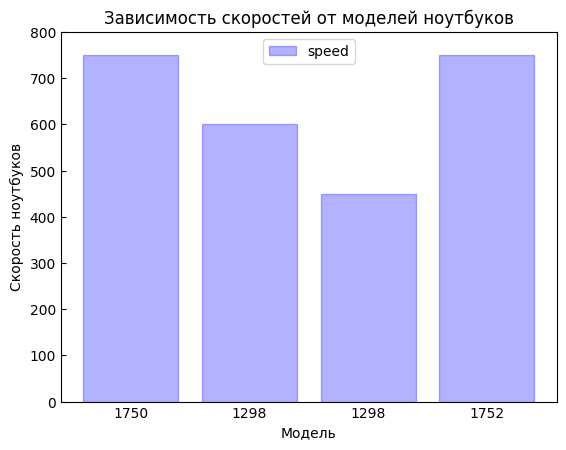

In [46]:
index = list(res1.index)
values = list(res1['speed'])
ticks = list(res1['model'])

plt.bar(index, values, alpha = 0.3, color = 'b', tick_label = ticks, edgecolor = 'b', label = 'speed')
plt.tick_params(axis = 'both', which = 'major', direction = 'in', bottom = False)
plt.ylim(0,800)
plt.title('Зависимость скоростей от моделей ноутбуков')
plt.ylabel('Скорость ноутбуков')
plt.xlabel('Модель')
plt.legend()
plt.show()

На данном графике мы видим: самые высокие (и равные друг другу) показатели у моделей № 1750 и №1752.

### Задание 3

Найдите номера моделей, тип и цены всех ноутбуков производителя А. Отсортируйте по убыванию цены. Постройте гистограмму изменения цены. Опишите полученную гистограмму.

In [47]:
# Для начала объединим таблицы laptop и product по модели:

res = pandas.merge(laptop, product, on='model').sort_values('maker')
res

,code,model,speed,ram,hd,price,screen,maker,type
0,1,1298,350,32,4,700.0,11,A,Laptop
1,4,1298,600,64,10,1050.0,15,A,Laptop
2,6,1298,450,64,10,950.0,12,A,Laptop
5,5,1752,750,128,10,1150.0,14,A,Laptop
4,3,1750,750,128,12,1200.0,14,B,Laptop
3,2,1321,500,64,8,970.0,12,C,Laptop


In [48]:
# Выведем модели, тип и цены всех ноутбуков производителя А, с сортировкой по убыванию цены:

result_lap = res[res['maker'] == 'A'].sort_values('price', ascending = False)
result = result_lap[['model','type', 'price']]
result

,model,type,price
5,1752,Laptop,1150.0
1,1298,Laptop,1050.0
2,1298,Laptop,950.0
0,1298,Laptop,700.0


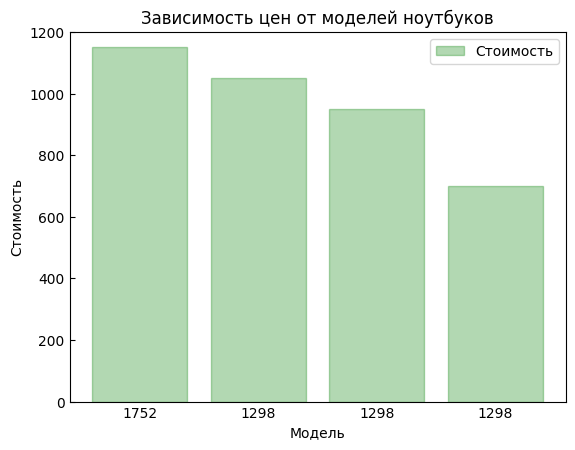

In [49]:
# Построим график по получившимся данным:

index = list(range(len(result_lap.index)))
values = list(result_lap['price'])
ticks = list(result_lap['model'])

plt.bar(index, values, alpha = 0.3, color = 'g', tick_label = ticks, edgecolor = 'g', label = 'Стоимость')
plt.tick_params(axis = 'both', which = 'major', direction = 'in', bottom = False)
plt.ylim(0,1200)
plt.title('Зависимость цен от моделей ноутбуков')
plt.ylabel('Стоимость')
plt.xlabel('Модель')
plt.legend()
plt.show()

На данной гистаграмме мы видим, что самый высокий показатель стоимости также у модели №1752. Все три ноутбука модели №1298 занимают оставшиеся позиции.

### Задание 4

Найдите производителя, номер модели и цену среди ноутбуков с наибольшей стоимостью до 1000; Нарисуйте график зависимости цен от всех производителей ноутбуков. Опишите полученный график.

In [55]:
# Делаем выборку ноутбуков со стоимостью до 1000:
lap4 = laptop[laptop['price'] < 1000].sort_values('price', ascending=False)

# Соединяем две таблицы:
res4 = pandas.merge(lap4, product, on='model')

# В данной таблице искомые нами данные по заданным характеристикам для ноутбуков:
res4[['maker','model','price']]

,maker,model,price
0,C,1321,970.0
1,A,1298,950.0
2,A,1298,700.0


In [56]:
# Нам нужен только один ноутбук с наибольшей стоимостью до 1000:

res4[['maker','model','price']].head(1)

,maker,model,price
0,C,1321,970.0


In [57]:
# Нарисуем график зависимости цен от всех производителей ноутбуков

# Для начала объединим таблицы laptop и product по модели с сортировкой по производителю и цене:

res4_1 = pandas.merge(laptop, product, on='model').sort_values(['maker','price'])
res4_1

,code,model,speed,ram,hd,price,screen,maker,type
0,1,1298,350,32,4,700.0,11,A,Laptop
2,6,1298,450,64,10,950.0,12,A,Laptop
1,4,1298,600,64,10,1050.0,15,A,Laptop
5,5,1752,750,128,10,1150.0,14,A,Laptop
4,3,1750,750,128,12,1200.0,14,B,Laptop
3,2,1321,500,64,8,970.0,12,C,Laptop


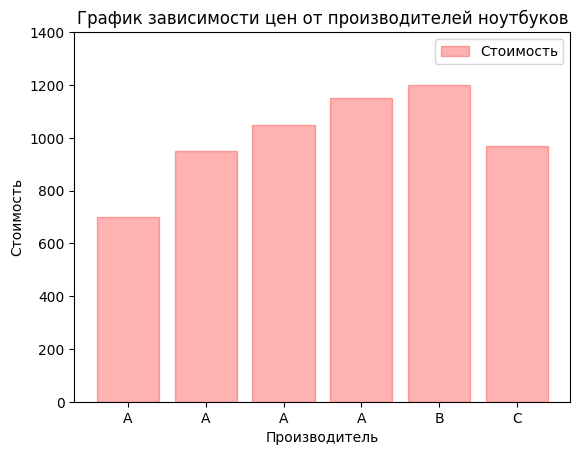

In [58]:
# А затем по полученным данным построим график:

index = list(range(len((res4_1.index))))
values = list(res4_1['price'])
ticks = list(res4_1['maker'])

plt.bar(index, values, alpha = 0.3, color = 'r', tick_label = ticks, edgecolor = 'r', label = 'Стоимость')
plt.tick_params(axis = 'both', which = 'major', direction = 'out')
plt.ylim(0,1400)
plt.title('График зависимости цен от производителей ноутбуков')
plt.ylabel('Стоимость')
plt.xlabel('Производитель')
plt.legend()
plt.show()

На данном графике мы видим, что минимальное значение стоимости у производителя **А**, максимальное - у производителя **В**. У производителя **С** средние показания стоимости продукции.

### Задание 5

Найдите для каждой модели ПК их количество и максимальное и минимальное ram, сгруппируйте по моделям; переименуйте колонки макс. и мин. в “max/min_ram”;

In [12]:
# Объединим таблицы pc и product по модели:

res_5 = pandas.merge(pc,product, on='model') 

# Найдем количество для каждой модели ПК:

data_5 = pandas.pivot_table(res_5, index='model', values = 'type', aggfunc = len)

# Для удобства значения взяла из столбца 'type'

# Найдем для каждой модели:

import numpy as np

data5 = pandas.pivot_table(res_5, index='model', values='ram', aggfunc=np.max) # максимальное значение

data5_1 = pandas.pivot_table(res_5, index='model', values='ram', aggfunc=np.min) # минимальное значение

data_5_fin = data5.join(data5_1, on ='model', lsuffix = "_max", rsuffix = '_min') # объединим полученные данные через join
# с подписями где какая колонка

data_res_5 = pandas.merge(data_5, data_5_fin, on='model') # объединим с первой таблицей

data_res_5.rename(columns={'ram_max': 'max_ram', 'ram_min': 'min_ram','type':'amount'}, inplace=True) # переименуем колонки
data_res_5

,amount,max_ram,min_ram
model,,,
1121,3,128,128
1232,4,64,32
1233,4,128,64
1260,1,32,32


### Задание 6

Проверте гипотезу: «Самые дорогие ноутбуки у производителя А». Опишите полученный результат.

In [73]:
# Объединим таблицы по модели и отсортируем по производителю и цене для удобства:

res6 = pandas.merge(laptop, product, on='model').sort_values(['maker','price'])
res6

,code,model,speed,ram,hd,price,screen,maker,type
0,1,1298,350,32,4,700.0,11,A,Laptop
2,6,1298,450,64,10,950.0,12,A,Laptop
1,4,1298,600,64,10,1050.0,15,A,Laptop
5,5,1752,750,128,10,1150.0,14,A,Laptop
4,3,1750,750,128,12,1200.0,14,B,Laptop
3,2,1321,500,64,8,970.0,12,C,Laptop


In [74]:
# вывела себе для проверки
res6.describe()

,speed,ram,hd,price,screen
count,6.000000,6.000000,6.00000,6.000000,6.000000
mean,566.666667,80.000000,9.00000,1003.333333,13.000000
std,163.299316,39.191836,2.75681,177.951304,1.549193
min,350.000000,32.000000,4.00000,700.000000,11.000000
25%,462.500000,64.000000,8.50000,955.000000,12.000000
50%,550.000000,64.000000,10.00000,1010.000000,13.000000
75%,712.500000,112.000000,10.00000,1125.000000,14.000000
max,750.000000,128.000000,12.00000,1200.000000,15.000000


In [75]:
result_6 = pandas.pivot_table(res6, index = 'maker', values = 'price', aggfunc = np.mean, margins = True)
result_6.reset_index(inplace=True)

In [76]:
result_6

,maker,price
0,A,962.500000
1,B,1200.000000
2,C,970.000000
3,All,1003.333333


В таблице **result_6** видно, что средняя стоимость ноутбуков производителей А меньше средней стоимости среди ноутбуков всех производителей. Сделаем проверку (если у нас будет не 3 производителя, а допустим 45, это облегчит дело):

In [77]:
if (result_6.at[0,'price'] == result_6.at[len(result_6.index)-1,'price']):
    print('Самые дорогие ноутбуки у производителя А')
else:
    print('Самые дорогие ноутбуки не у производителя А')

Самые дорогие ноутбуки не у производителя А


### Задание 7

Постройте матрицы корреляции для всех таблиц. Опишите полученный результат. 

Для всех матриц делается выборка **только числовых значений**.
Для построения матриц корреляции воспользуемся функцией [`corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [78]:
pc_corr = pc.corr(method = 'pearson', numeric_only = True)
pc_corr

,speed,ram,hd,price
speed,1.000000,0.818463,0.859476,0.884962
ram,0.818463,1.000000,0.547365,0.955008
hd,0.859476,0.547365,1.000000,0.622303
price,0.884962,0.955008,0.622303,1.000000


По результатам анализа видно, что стоимость ПК преимущественно зависит от размера оперативной памяти и гораздо менее от объёма жесткого диска.  Скорость преимущественно зависит от стоимости, в связи с чем можно сделать вывод, что чем больше размер оперативной памяти, тем выше стоимость, и тем больше скорость.

In [79]:
laptop_corr = laptop.corr(method = 'pearson', numeric_only = True)
laptop_corr

,speed,ram,hd,price,screen
speed,1.000000,0.950000,0.799671,0.954369,0.830098
ram,0.950000,1.000000,0.770054,0.908486,0.632456
hd,0.799671,0.770054,1.000000,0.929516,0.749269
price,0.954369,0.908486,0.929516,1.000000,0.819788
screen,0.830098,0.632456,0.749269,0.819788,1.000000


По результатам анализа видно, что стоимость ноутбуков преимущественно зависит от скорости и объёма жесткого диска, где скорость также тесно связана с размером оперативной памяти.

In [80]:
printer_corr = printer.corr(method = 'pearson', numeric_only = True)
printer_corr

,price
price,1.0


В таблице *printer* числовые значения принимает только колонка *price*

In [61]:
product_corr = product.corr(method = 'pearson', numeric_only = True)
product_corr

""


Так как у таблицы *product* нет числовых данных, после применения функции у нас получился пустой датафрейм.

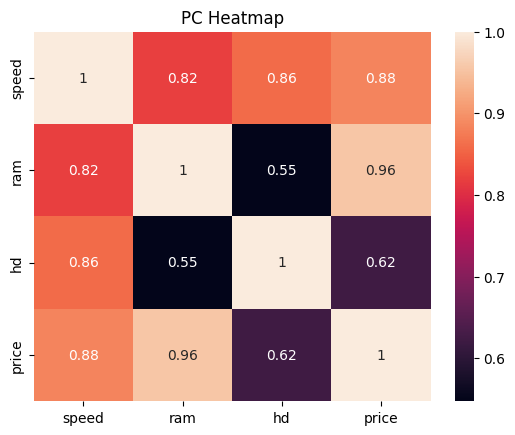

In [81]:
pc_heat = seaborn.heatmap(pc_corr, annot=True)
pc_heat.set(title = 'PC Heatmap')
plt.show()

На тепловой карте наглядна видна зависимость, чем светлее цвет, тем она больше. В данном случае - самый высокий показатель (не считая диагоналей) - между стоимостью и размером оперативной памяти.

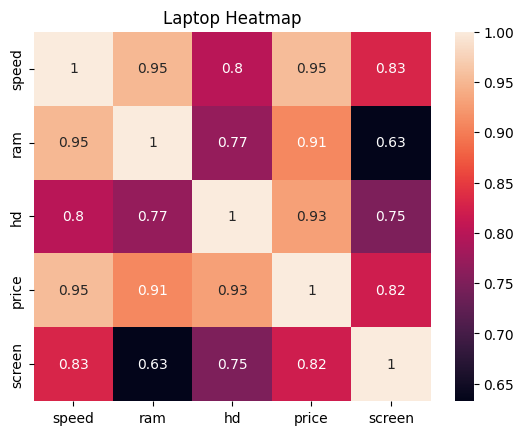

In [82]:
lp_heat = seaborn.heatmap(laptop_corr, annot=True)
lp_heat.set(title='Laptop Heatmap')
plt.show()

Так же, как и в предыдущем хитмэпе - чем светлее цвет, тем больше зависимость. Здесь мы можем наглядно видеть, что между скоростью и стоимостью, и скоростью и размером оперативной памяти прямая зависимость.

Тепловая карта для матрицы корреляции по принтерам будет состоять из одной ячейки со значением *1*.

### Задание 8

Нарисуйте график (не графики, на одном графики должно отображаться всё) зависимости цены ноутбука/ПК от объёма жесткого диска. Опишите ваши наблюдения, существует ли какая-то зависимость и т.п.

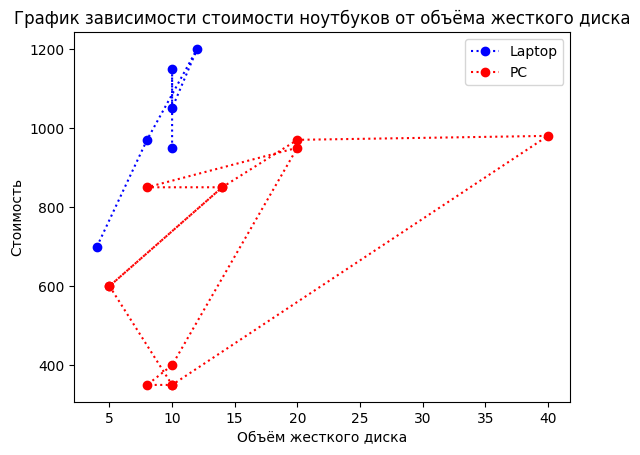

In [85]:
plt.plot(laptop['hd'], laptop['price'], marker = 'o', color='b', label = 'Laptop', linestyle=':')
plt.plot(pc['hd'], pc['price'], marker = 'o', color='r', label = 'PC', linestyle=':')
plt.xlabel('Объём жесткого диска')
plt.ylabel('Стоимость')
plt.title('График зависимости стоимости ноутбуков от объёма жесткого диска')
plt.legend()
plt.show()

В рамках этого задания, более корректным способом визуализации будет гистограмма:

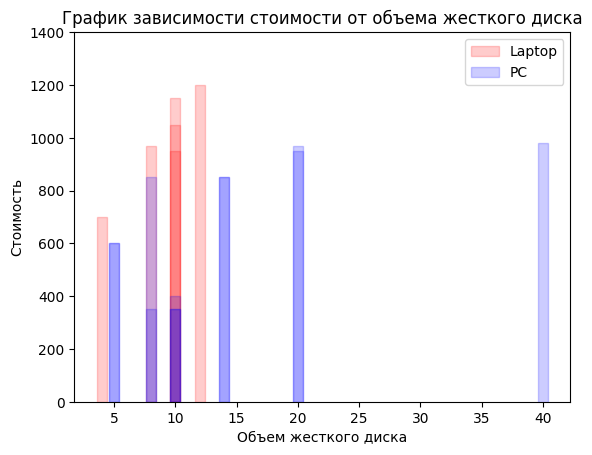

In [257]:
# Объединим таблицы laptop и pc с таблицей product по модели:
prod_lp_8 = product[product['type']=='Laptop']
prod_pc_8 = product[product['type']=='PC']

lp_8 = pandas.merge(laptop, prod_lp_8, on='model').sort_values('hd')
pc_8 = pandas.merge(pc, prod_pc_8, on='model').sort_values('hd')

# Строим гистограмму:
plt.bar(lp_8['hd'], lp_8['price'], alpha = 0.2, color = 'r', edgecolor = 'r', label = 'Laptop')
plt.bar(pc_8['hd'], pc_8['price'], alpha = 0.2, color = 'b', edgecolor = 'b', label = 'PC')
plt.tick_params(axis = 'both', which = 'major', direction = 'out')
plt.ylim(0,1400)
plt.title('График зависимости стоимости от объема жесткого диска')
plt.ylabel('Стоимость')
plt.xlabel('Объем жесткого диска')
plt.legend()
plt.show()

Судя по графику, можно отметить, что среди выбранных нами типов - у пк могут быть существенно бОльшие по объему жесткие диски (максимальный показатель - 40, тогда как у ноутбуков - до 15).

Среди ноутбуков - чем больше объем жесткого диска, тем выше стоимость. 
Среди ПК можно сказать точно также, однако некоторые модели, несмотря на относительно небольшой объем жесткого диска, имеют достаточно высокую стоимость.

### Задание 9

Найдите:

- количество товаров каждого типа у каждого производителя; постройте график pie, на должно отображаться доля каждого производителя. Опишите полученный график
- самый дорогой товар каждого типа, вывести тип и цену;
- производителей, делающих ноутбуки и пк ценой более 600$, но которые не производят принтеры, вывести производителя.


In [97]:
# количество товаров каждого типа у каждого производителя
df9 = pandas.pivot_table(product, index=['maker','type'], aggfunc = len)
df9

model
maker type          
A     Laptop       2
      PC           2
      Printer      3
B     Laptop       1
      PC           1
C     Laptop       1
D     Printer      2
E     PC           3
      Printer      1

<Figure size 2000x2000 with 0 Axes>

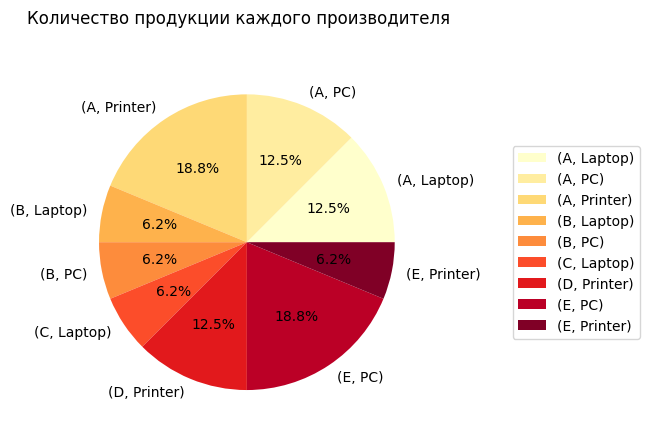

In [111]:
# постройте график pie, на котором должна отображаться доля каждого производителя. Опишите полученный график
plt.figure(figsize=(20,20))
df9.plot(kind='pie', subplots=True, cmap="YlOrRd", 
         ylabel = '', title = 'Количество продукции каждого производителя', autopct='%1.1f%%')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

На данной диаграмме мы видим, что преимущественно больше всего товаров у производителя *А*, меньше всего - у *С*.
Принтеры производителя А и ПК производителя Е делят "первое место" в объеме продукции по отношению ко всей продукции рынка.

In [76]:
# самый дорогой товар каждого типа, вывести тип и цену;

# Для начала соединим таблицы laptop,pc и printer с таблицей product:
lp_pr = pandas.merge(laptop, product, how='left', on='model').sort_values('price', ascending = False)
pc_pr = pandas.merge(pc, product, how='left', on='model').sort_values('price', ascending = False)
printer_pr = pandas.merge(printer, product, how='left', on='model').sort_values('price', ascending = False)

# Найдем максимальные значения:
lp_exp = lp_pr[lp_pr['price'] == lp_pr['price'].max()]
pc_exp = pc_pr[pc_pr['price'] == pc_pr['price'].max()]
printer_exp = printer_pr[printer_pr['price'] == printer_pr['price'].max()]

# Соединим полученные таблицы в одну
result = pandas.concat([lp_exp,pc_exp,printer_exp], keys=['Laptop','PC','Printer'])
result[['price']]

price
Laptop  2  1200.0
PC      2   980.0
Printer 0   400.0
        5   400.0

Как мы видим, у принтеров 2 самых дорогих товара.

In [172]:
# производителей, делающих ноутбуки и пк ценой более 600$, но которые не производят принтеры, вывести производителя

# Определим списки производителей ноутбуков, ПК и принтеров с нужными нам характеристиками:

lp9 = laptop[laptop['price']>600]
lp_9 = pandas.merge(lp9, product,on='model')[['maker']] # производители ноутбков

pc9 = pc[pc['price']>600]
pc_9 = pandas.merge(pc9, product,on='model')[['maker']] # производители ПК

printer_9 = pandas.merge(printer, product,on='model')[['maker']] # производители принтеров

# Найдем производителей И ПК, И ноутбуков
lp_pc = pandas.merge(lp_9, pc_9, how='inner', on='maker') # производители ПК и ноутбуков

# Объединим таблицы
res = pandas.merge(lp_pc, printer_9, how = 'left', indicator=True).query("_merge == 'left_only'")[['maker']]
# indicator=True покажет, как были объединены таблицы
# методом query определим, какие производители есть ТОЛЬКО в lp_pc, а какие есть и в lp_pc, и в printer_9
# метод unique поможет определить уникальные значения:
res['maker'].unique()

array(['B'], dtype=object)

В итоге, у нас один производитель - B.

In [405]:
# В качестве проверки простроим pivot_table с объединением по производителю и типу:
pandas.pivot_table(product, index = ['maker','type'])

model
maker type                
A     Laptop   1525.000000
      PC       1232.500000
      Printer  1361.666667
B     Laptop   1750.000000
      PC       1121.000000
C     Laptop   1321.000000
D     Printer  1360.500000
E     PC       1828.333333
      Printer  1434.000000

Как мы видим, только производитель В выпускает И ноутбуки, И пк, но НЕ принтеры.

### Задание 10

Выведите новую цену каждого ноутбука и ПК получив её как модель+цена+ram. Дайте колонке название ‘strange_sum’

In [335]:
# Сохраним таблицу laptop для изменения в другую переменную и добавим колонку 'strange_sum':
lp_10 = laptop
lp_10.insert(len(laptop.columns), 'strange_sum', 0)

Для того, чтобы просуммировать построчно применим функцию [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)

In [354]:
# Сделаем выборку нужных нам колонок
l_10 = lp_10[['model','price','ram']]
# Добавим суммированные колонки в основную рабочую таблицу:
lp_10['strange_sum'] = l_10.sum(axis=1)

In [360]:
lp_10[['strange_sum']]

,strange_sum
0,2030.0
1,2355.0
2,3078.0
3,2412.0
4,3030.0
5,2312.0


То же самое сделаем и для ПК:

In [361]:
pc_10 = pc
pc_10.insert(len(pc.columns), 'strange_sum', 0)

In [362]:
p_10 = pc_10[['model','price','ram']]

pc_10['strange_sum'] = p_10.sum(axis=1)
pc_10[['strange_sum']]

,strange_sum
0,1896.0
1,1642.0
2,2341.0
3,2331.0
4,2099.0
5,1897.0
6,2099.0
7,2099.0
8,2311.0
9,1664.0


### Задание 11

Найти производителей, делающих ноутбуки и ПК, но не принтеры;

In [176]:
# Определим списки производителей ноутбуков, ПК и принтеров:

lp_12 = pandas.merge(laptop, product,on='model')[['maker']] # производители ноутбков

pc_12 = pandas.merge(pc, product,on='model')[['maker']] # производители ПК

printer_12 = pandas.merge(printer, product,on='model')[['maker']] # производители принтеров

# Найдем производителей И ПК, И ноутбуков
lp_pc = pandas.merge(lp_12, pc_12, how='inner', on='maker') # производители ПК и ноутбуков

# Объединим таблицы
res = pandas.merge(lp_pc, printer_12, how = 'left', indicator=True).query("_merge == 'left_only'")[['maker']]
# методом query определим, какие производители есть ТОЛЬКО в lp_pc, а какие есть и в lp_pc, и в printer_12
# метод unique поможет определить уникальные значения:
res['maker'].unique()

array(['B'], dtype=object)

### Задание 12

Найдите производителя ПК и модель, чья цена ниже средней цены ноутбука, а ram и скорость больше в 1.5 и 1.2 раза соответственно;

In [13]:
# Подготовим таблицу пк, по которой будем делать выборку:

pc_12 = pandas.merge(pc, product, on='model')
pc_12

# Найдем нужные значения для выборки:

avg_price = np.mean(laptop['price'])
avg_ram = np.mean(laptop['ram'])
avg_speed = np.mean(laptop['speed'])

# Выведем производителя и  модель:
pc_12[(pc_12['price'] < avg_price)&(pc_12['ram'] > avg_ram*1.5)&(pc_12['speed']>avg_speed*1.2)][['maker','model']].drop_duplicates()

,maker,model
5,A,1233
9,B,1121


### Задание 13

Написать общий вывод о полученных результатах (какие важные закономерности были вами обнаружены или получены и т.п.)

1. Производитель А самый крупный из всех представленных. Единственный из всех производит все виды товаров.
2. Построив диаграммы (см. ниже) по каждому производителю по производимой продукции мы видим, что производитель С производит только ноутбуки, а производитель D - только принтеры. В условиях рынка - такая узная специализация не совсем уместна.

<Figure size 640x480 with 0 Axes>

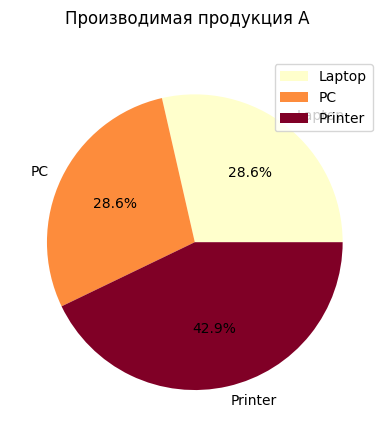

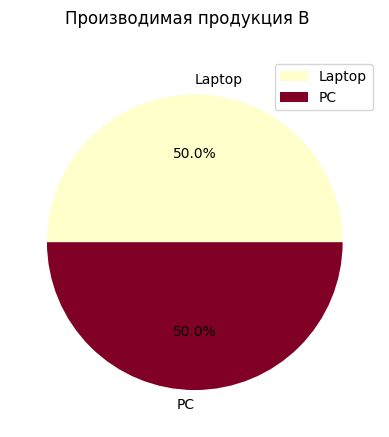

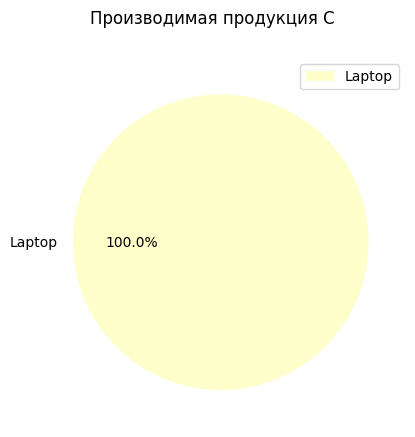

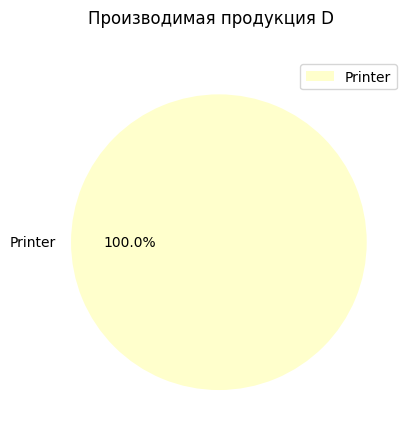

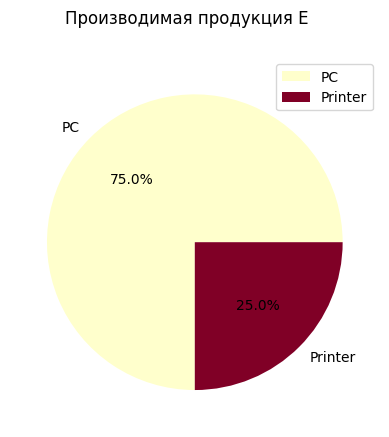

In [113]:
plt.figure()
df9.loc['A'].plot(kind='pie', subplots=True, cmap="YlOrRd", 
         ylabel = '',title='Производимая продукция A', autopct='%1.1f%%')
df9.loc['B'].plot(kind='pie', subplots=True, cmap="YlOrRd", 
         ylabel = '', title='Производимая продукция B', autopct='%1.1f%%')
df9.loc['C'].plot(kind='pie', subplots=True, cmap="YlOrRd", 
         ylabel = '', title='Производимая продукция C', autopct='%1.1f%%')
df9.loc['D'].plot(kind='pie', subplots=True, cmap="YlOrRd", 
         ylabel = '', title='Производимая продукция D', autopct='%1.1f%%')
df9.loc['E'].plot(kind='pie', subplots=True, cmap="YlOrRd", 
         ylabel = '', title='Производимая продукция E', autopct='%1.1f%%')
plt.show()